# Summarizing video data from single horizontal lines

Leanne Friedrich 08/02/21

## initialization

In [7]:
%load_ext autoreload
%autoreload 2
LOGGERDEFINED = False

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import os
import sys
sys.path.append("../")
from py.config import cfg
import py.logs as logs
import py.metrics as me
from printVals import *
from plainIm import plainIm
import matplotlib.pyplot as plt
import metricPlots as mp
import regression as rg
import matplotlib.cm as cm
LOGGERDEFINED = logs.openLog('vidSummaries.ipynb', LOGGERDEFINED, level='DEBUG', exportLog=False)

## analyzing data

In [9]:
ss,u = me.importStillsSummary(diag=True)
seg, useg = me.importStillsSummary(file='segmentsSummary.csv', diag=False)
ss = ss.merge(seg[['folder', 'horiz_segments']], on='folder', suffixes=['', '_manual'], how='left')

Independents: ['folder', 'bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['xs_aspect', 'xs_xshift', 'xs_yshift', 'xs_area', 'xs_areaN', 'xs_wN', 'xs_hN', 'xs_roughness', 'vert_wN', 'vert_hN', 'v

In [10]:
vs,uv = me.importStillsSummary(file='videoSummary.csv', diag=True)
seg, useg = me.importStillsSummary(file='segmentsSummary.csv', diag=False)
vs = vs.merge(seg[['folder', 'wetting', 'horiz_segments']], on='folder', suffixes=['', ''], how='left')

Independents: ['folder', 'bn', 'date', 'sigma', 'di', 'do', 'fluFile', 'calibFile', 'viscRatio', 'vRatio', 'ReRatio', 'rGrav', 'dEst', 'hDragP', 'vDragP', 'int_CaInv', 'int_Re', 'pressureCh0', 'ink_shortname', 'ink_days', 'ink_rheModifier', 'ink_surfactant', 'ink_dye', 'ink_var', 'ink_val', 'ink_base', 'ink_type', 'ink_tau0', 'ink_eta0', 'ink_density', 'ink_v', 'ink_rate', 'ink_visc0', 'ink_CaInv', 'ink_Re', 'ink_WeInv', 'ink_OhInv', 'ink_dPR', 'ink_dnormInv', 'ink_Bm', 'sup_shortname', 'sup_days', 'sup_rheModifier', 'sup_surfactant', 'sup_dye', 'sup_var', 'sup_val', 'sup_base', 'sup_type', 'sup_tau0', 'sup_eta0', 'sup_density', 'sup_v', 'sup_rate', 'sup_visc0', 'sup_CaInv', 'sup_Re', 'sup_WeInv', 'sup_OhInv', 'sup_dPR', 'sup_dnormInv', 'sup_Bm', 'sup_Ca', 'ink_Ca', 'sweepType', 'sup_dnorm', 'ink_dnorm', 'sup_We', 'ink_We', 'sup_Oh', 'ink_Oh', 'int_Ca']

Dependents: ['projectionN', 'projShiftN', 'vertDispBotN', 'vertDispTopN', 'vertDispMidN']


# video data

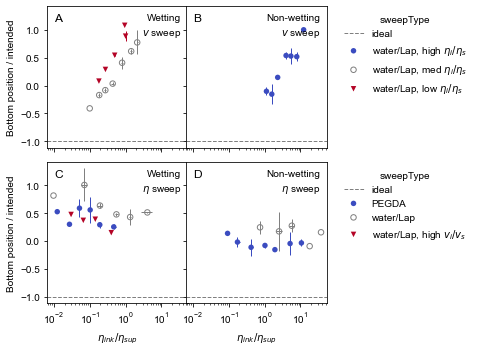

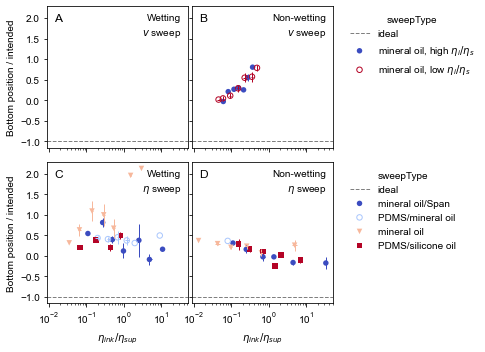

In [152]:
# vertDispBotN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
# projectionN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle

sslap = vs.copy()
sslap = sslap[sslap.sigma==0]
ssca = vs.copy()
ssca = ssca[ssca.sigma>0]
# ssca = ssca[ssca.horiz_segments==3]
for k, ss11 in enumerate([sslap, ssca]):
    ss1 = ss11.copy()
    ss1 = ss1.sort_values(by=['sigma', 'sweepType'])
    ss1 = ss1[ss1.ink_days==1]
#     mp.simplifyType(ss1)

    ssvisc = ss1[ss1.sweepType.str.startswith('visc')]
    ssspeed = ss1[ss1.sweepType.str.startswith('speed')]
    fig,axs = plt.subplots(2,2,figsize=(6.5, 5), sharey=True, sharex=True)
    fs = 10
    for i,ss0 in enumerate([ssspeed, ssvisc]):
        for j,w in enumerate([1,0]):
            sstemp = ss0.copy()
            sstemp.loc[sstemp.wetting!=w, 'viscRatio'] = -1
            me.plainTypes(sstemp, incSweep=False)
            mp.scatterSS(sstemp, 'viscRatio', 'vertDispBotN', 'sweepType', logx=True, yideal=-1, ax=axs[i][j], fig=fig, 
                           legend=(j==1), legendloc='right', dx=0.15, fontsize=fs, markersize=30)
            if w==0:
                axs[i][j].text(0.95, 0.95, 'Non-wetting', fontsize=fs, transform=axs[i][j].transAxes, horizontalalignment='right', verticalalignment='top')
            else:
                axs[i][j].text(0.95, 0.95, 'Wetting', fontsize=fs, transform=axs[i][j].transAxes, horizontalalignment='right', verticalalignment='top')
            if i==0:
                axs[i][j].text(0.95, 0.85, '$v$ sweep', fontsize=fs, transform=axs[i][j].transAxes, horizontalalignment='right', verticalalignment='top')
            else:
                axs[i][j].text(0.95, 0.85, '$\eta$ sweep', fontsize=fs, transform=axs[i][j].transAxes, horizontalalignment='right', verticalalignment='top')
                
            axs[i][j].set_xlabel('$\eta_{ink}/\eta_{sup}$')
    axs[0][0].set_xlabel('')
    axs[0][1].set_xlabel('')
    for axrow in axs:
        for ax in axrow:
#             ax.set_xlim([0.5*10**-2, 6*10])
            mp.setSquare(ax)
        axrow[0].set_ylabel('Bottom position / intended')
        axrow[1].set_ylabel('')
    plt.subplots_adjust(wspace=0, hspace=0)
    mp.subFigureLabels(axs)
    fig.tight_layout()
    fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', f'wetting vert disp_{k}.pdf'), bbox_inches='tight', dpi=300)

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'vertDispBotN'}, xlabel='ink_val', ylabel='sup_val'>)

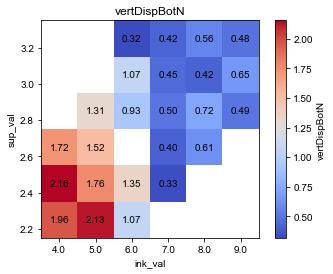

In [122]:
mp.colorMeshSS(vsr, 'ink_val', 'sup_val', 'vertDispBotN')

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='visc0Prod', ylabel='vertDispBotN'>)

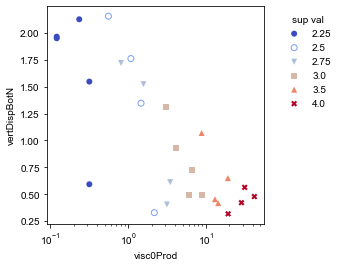

In [125]:
fig, ax = mp.scatterSS(vsr, 'visc0Prod', 'vertDispBotN', 'sup_val', logx=True, dx=0, dy=0)

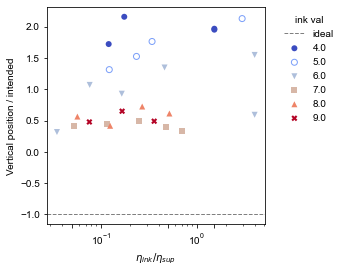

In [153]:
vsr = vs[(vs.sweepType=='visc_M')&(vs.wetting==1)]
# fig,axs = plt.subplots(2,1, figsize=(3,6), sharex=True, sharey=True)
# mp.scatterSS(vsr, 'viscRatio', 'vertDispBotN', 'sup_val', logx=True, dx=0, dy=0, ax=axs[0], legendloc='right')
fig, ax = mp.scatterSS(vsr, 'viscRatio', 'vertDispBotN', 'ink_val', logx=True, dx=0, dy=0, yideal=-1, legendloc='right')
ax.set_xlabel('$\eta_{ink}/\eta_{sup}$')
ax.set_ylabel('Vertical position / intended')
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', f'wetting vert disp_mineral.pdf'), bbox_inches='tight', dpi=300)
# vs[(vs.sweepType=='visc_20')&(vs.wetting==1)]

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='ReRatio', ylabel='vertDispBotN'>)

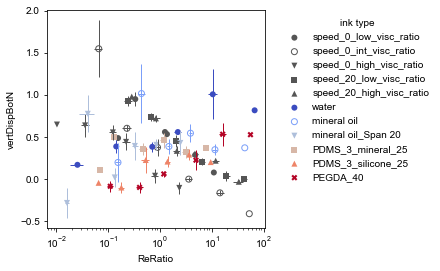

In [101]:
mp.sweepTypeSS(vs, 'ReRatio', 'vertDispBotN', logx=True, dx=0.2)

In [154]:
mp.regressionTable(ss1[ss1.wetting==1], 'vertDispBotN', tag='wetting', nickname='bottom position with wetting', export=True, printOut=False, logy=False);
mp.regressionTable(ss1[ss1.wetting==0], 'vertDispBotN', tag='nonwetting', nickname='bottom position without wetting', export=True, printOut=False, logy=False);

INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\regressions\vertDispBotNwettingRegNonZero.tex
---------------------------


INFO: Exported C:/Users/lmf1/OneDriveNIST/NIST/data/shopbot/results\regressions\vertDispBotNnonwettingRegNonZero.tex
---------------------------




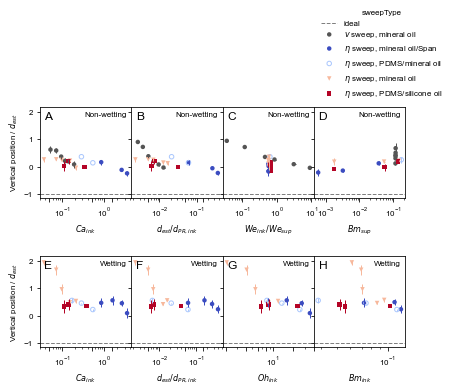

In [158]:
# vertDispBotN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
# projectionN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle

ss1 = vs.copy()
ss1 = ss1.sort_values(by=['sigma', 'sweepType'])
ss1 = ss1[ss1.ink_days==1]
mp.simplifyType(ss1)
me.plainTypes(ss1)
ssca = ss1[ss1.sigma>0]
me.addRatios(ssca, varlist=['We'], operator='Ratio')
fig,axs = plt.subplots(2,4,figsize=(6.5, 5.5), sharey=True, sharex=False)
fs = 8
for j,w in enumerate([0,1]):
    for i,xvar in enumerate([['ink_Ca','ink_dnorm', 'WeRatio', 'sup_Bm'], ['ink_Ca','ink_dnorm', 'ink_Oh', 'ink_Bm']][j]):
        mp.sweepTypeSS(ssca[ssca.wetting==w], xvar, 'vertDispBotN', logx=True, yideal=-1, ax=axs[j][i], fig=fig, 
                       legend=((i==3)&(j==0)), dx=0.2, fontsize=fs, markersize=20)
        if w==0:
            axs[j][i].text(0.95, 0.95, 'Non-wetting', fontsize=fs, transform=axs[j][i].transAxes, horizontalalignment='right', verticalalignment='top')
        else:
            axs[j][i].text(0.95, 0.95, 'Wetting', fontsize=fs, transform=axs[j][i].transAxes, horizontalalignment='right', verticalalignment='top')
# for axrow in axs:
#     axrow[0].set_xlim([5*10**-2, 3])
#     axrow[1].set_xlim([3*10**-3, 0.3])
for axrow in axs:
    for ax in axrow:
        mp.setSquare(ax)
        ax.set_ylabel('')
    axrow[0].set_ylabel('Vertical position / $d_{est}$')
axs[0][0].set_xlabel('$Ca_{ink}$')
axs[0][1].set_xlabel('$d_{est}/d_{PR,ink}$')
axs[0][2].set_xlabel('$We_{ink}/We_{sup}$')
axs[0][3].set_xlabel('$Bm_{sup}$')
axs[1][0].set_xlabel('$Ca_{ink}$')
axs[1][1].set_xlabel('$d_{est}/d_{PR,ink}$')
axs[1][2].set_xlabel('$Oh_{ink}$')
axs[1][3].set_xlabel('$Bm_{ink}$')
fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
mp.subFigureLabels(axs)
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'vert_disp_corrs_nonzero.pdf'), bbox_inches='tight', dpi=300)

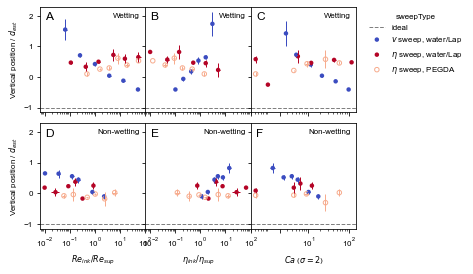

In [172]:
# vertDispBotN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
# projectionN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
sslap = vs.copy()
sslap = sslap[sslap.sigma==0]
mp.simplifyType(sslap)
me.plainTypes(sslap)
sslap.loc[sslap.sigma==0,'sigma'] = 2
sslap['int_Ca'] = sslap['ink_v']*sslap['sup_visc0']/sslap['sigma']
sslap['sup_Ca'] = sslap['sup_v']*sslap['sup_visc0']/sslap['sigma']
sslap['ink_Ca'] = sslap['ink_v']*sslap['ink_visc0']/sslap['sigma']
me.addRatios(ssca, varlist=['We'], operator='Ratio')
fig,axs = plt.subplots(2,3,figsize=(6.5, 4), sharey=True, sharex='col')
fs = 8
for j,w in enumerate(sslap.wetting.unique()):
    for i,xvar in enumerate(['ReRatio', 'viscRatio', 'int_Ca']):
        mp.sweepTypeSS(sslap[sslap.wetting==w], xvar, 'vertDispBotN', logx=True, yideal=-1, ax=axs[j][i], fig=fig, 
                       legend=((i==2)&(j==0)), legendloc='right', dx=0.2, fontsize=fs, markersize=20)
        if w==0:
            axs[j][i].text(0.95, 0.95, 'Non-wetting', fontsize=fs, transform=axs[j][i].transAxes, horizontalalignment='right', verticalalignment='top')
        else:
            axs[j][i].text(0.95, 0.95, 'Wetting', fontsize=fs, transform=axs[j][i].transAxes, horizontalalignment='right', verticalalignment='top')
for ax in axs[0]:
    ax.set_xlabel('')
for axrow in axs:
    axrow[2].set_xticks([2*10**0, 10**1, 10**2])
for axrow in axs:
    for ax in axrow:
        mp.setSquare(ax)
        ax.set_ylabel('')
    axrow[0].set_ylabel('Vertical position / $d_{est}$')
for axrow in [axs[1]]:
    axrow[0].set_xlabel('$Re_{ink}/Re_{sup}$')
    axrow[1].set_xlabel('$\eta_{ink}/\eta_{sup}$')
    axrow[2].set_xlabel('$Ca$ ($\sigma=2$)')


fig.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
mp.subFigureLabels(axs)
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'vert_disp_corrs_zero.pdf'), bbox_inches='tight', dpi=300)

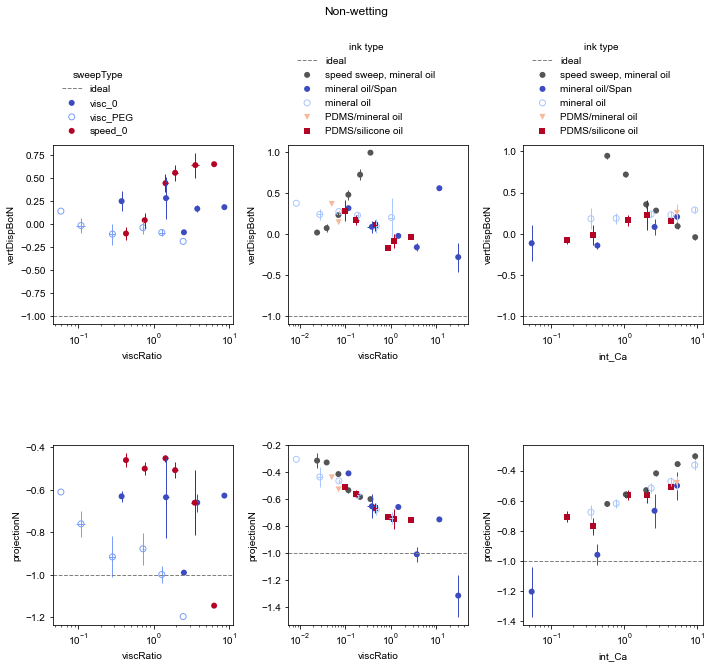

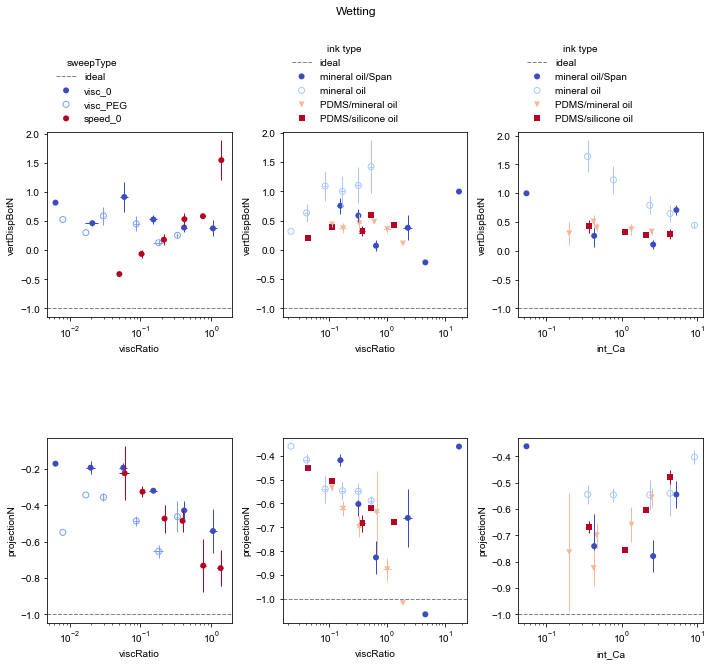

In [287]:
# vertDispBotN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
# projectionN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle

ss1 = vs.copy()
ss1 = ss1.sort_values(by=['sigma', 'sweepType'])
ss1 = ss1[ss1.ink_days==1]
mp.simplifyType(ss1)
me.plainTypes(ss1)
ssca = ss1[ss1.sigma>0]
sslap = ss1[ss1.sigma==0]
for w in [0,1]:
    fig,axs = plt.subplots(2,3,figsize=(10,10))
    for k,ss0 in enumerate([sslap, ssca]):
        for i,s2 in enumerate(['viscRatio', 'int_Ca'][0:k+1]):
            for j,s in enumerate(['vertDispBotN', 'projectionN']):
                mp.sweepTypeSS(ss0[ss0.wetting==w], s2, s, logx=True, yideal=[-1, -1][j], ax=axs[j][i+k], fig=fig, legend=(j==0), dx=0.2)
    fig.tight_layout()
    if w==0:
        fig.suptitle('Non-wetting')
    else:
        fig.suptitle('Wetting')

In [273]:
vs[(vs.sweepType=='visc_20')&(vs.vertDispBotN>0.5)]

,folder,bn,date,sigma,di,do,fluFile,calibFile,viscRatio,vRatio,...,vertDispBotN,vertDispBotN_SE,vertDispBotN_N,vertDispTopN,vertDispTopN_SE,vertDispTopN_N,vertDispMidN,vertDispMidN_SE,vertDispMidN_N,wetting
38,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M4_S_2.25_210519,210519.0,20.0,0.6,0.91,True,True,0.22,1.0,...,1.97,0.23,25.0,3.48,0.16,25.0,2.72,0.18,25.0,NaN
39,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M4_S_2.25_210921,210921.0,20.0,0.6,0.91,True,True,0.22,1.0,...,1.95,0.12,34.0,3.13,0.09,34.0,2.54,0.10,34.0,1.0
40,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M4_S_2.50_210519,210519.0,20.0,0.6,0.91,True,True,0.11,1.0,...,2.16,0.10,37.0,3.19,0.09,37.0,2.67,0.09,37.0,NaN
42,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M4_S_2.75_210519,210519.0,20.0,0.6,0.91,True,True,0.10,1.0,...,1.72,0.06,54.0,2.65,0.06,54.0,2.19,0.05,54.0,NaN
47,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M5_S_2.25_210519,210519.0,20.0,0.6,0.91,True,True,0.43,1.0,...,2.13,0.19,29.0,3.42,0.08,27.0,2.88,0.10,27.0,NaN
49,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M5_S_2.50_210519,210519.0,20.0,0.6,0.91,True,True,0.21,1.0,...,1.76,0.09,42.0,2.72,0.09,42.0,2.24,0.09,42.0,NaN
51,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M5_S_2.75_210519,210519.0,20.0,0.6,0.91,True,True,0.19,1.0,...,1.52,0.09,53.0,2.63,0.05,53.0,2.08,0.06,53.0,NaN
53,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M5_S_3.00_210519,210519.0,20.0,0.6,0.91,True,True,0.06,1.0,...,1.31,0.05,59.0,2.58,0.07,59.0,1.91,0.04,57.0,NaN
57,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M6_S_2.25_210519,210519.0,20.0,0.6,0.91,True,True,0.58,1.0,...,0.59,0.14,17.0,1.76,0.29,17.0,1.17,0.17,17.0,NaN
58,//cfs2e.nist.gov/642/internal/3D Printing Lab/...,I_M6_S_2.25_210824,210824.0,20.0,0.6,0.91,True,True,0.58,1.0,...,1.55,0.12,43.0,3.02,0.07,43.0,2.29,0.08,43.0,1.0


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='viscRatio', ylabel='vertDispBotN'>)

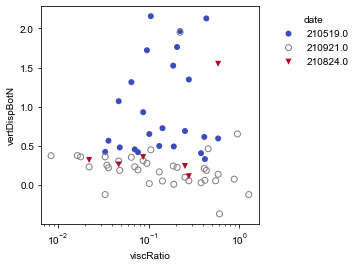

In [275]:
mp.scatterSS(vs[vs.sweepType=='visc_20'], 'viscRatio', 'vertDispBotN', 'date',dy=0, dx=0, logx=True)

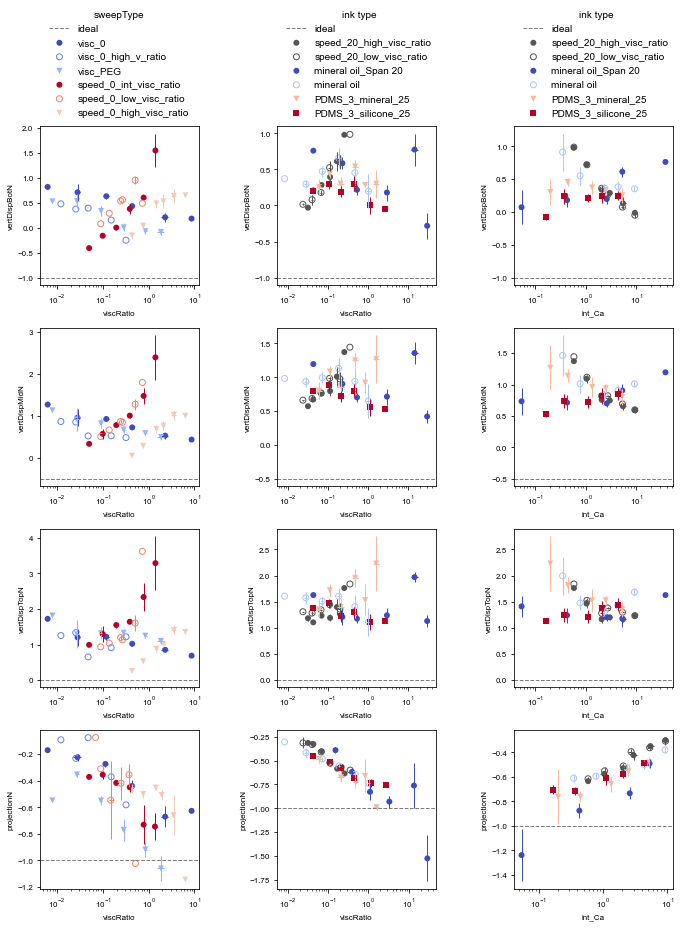

In [241]:
# vertDispBotN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
# projectionN = -1: bottom of filament is 1 estimated filament diameter below bottom of nozzle
ssca = vs.copy()
ssca = ss1[ss1.sigma>0]
sslap = vs.copy()
sslap = ss1[ss1.sigma==0]
for ssi in [ssca, sslap]:
    ssi = ssi.sort_values(by='sigma')
    ssi = ssi[ssi.ink_days==1]
    mp.simplifyType(ssi)
fig,axs = plt.subplots(4,3,figsize=(10,13))
for k,ss0 in enumerate([sslap, ssca]):
    for i,s2 in enumerate(['viscRatio', 'int_Ca'][0:k+1]):
        for j,yvar in enumerate(['vertDispBotN', 'vertDispMidN', 'vertDispTopN', 'projectionN']):
            mp.sweepTypeSS(ss0[ss0[yvar+'_N']>5], s2, yvar, logx=True, yideal=[-1, -0.5, 0, -1][j], ax=axs[j][i+k], fig=fig, legend=(j==0), dx=0.2)
fig.tight_layout()

(<Figure size 432x288 with 0 Axes>,
 <AxesSubplot:xlabel='viscRatio', ylabel='vertDispBotN'>)

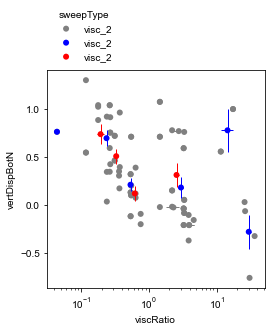

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [23]:
fig,ax = plt.subplots(1,1)
mp.scatterSS(ssca[ssca.sweepType=='visc_2'], 'viscRatio', 'vertDispBotN', 'sweepType', dx=0, dy=0, logx=True, grid=False, color='gray', ax=ax)
mp.scatterSS(ssca[ssca.sweepType=='visc_2'], 'viscRatio', 'vertDispBotN', 'sweepType', dx=0.2, dy=1, logx=True, grid=True, color='blue', ax=ax)
mp.scatterSS(ssca[ssca.sweepType=='visc_2'], 'viscRatio', 'vertDispBotN', 'sweepType', dx=0.2, dy=1, logx=True, grid=False, color='red', ax=ax)


In [244]:
vs[(vs.vertDispBotN>1)&(vs.sigma==2)][['bn', 'viscRatio', 'projectionN']]

,bn,viscRatio,projectionN
130,I_M4S_S_2.50T_210518,1.46,-0.66
145,I_M5S_S_3.00T_210518,0.18,-0.28
146,I_M5S_S_3.00T_210922,0.18,-0.47
157,I_M6S_S_3.00T_210922,0.26,-0.63


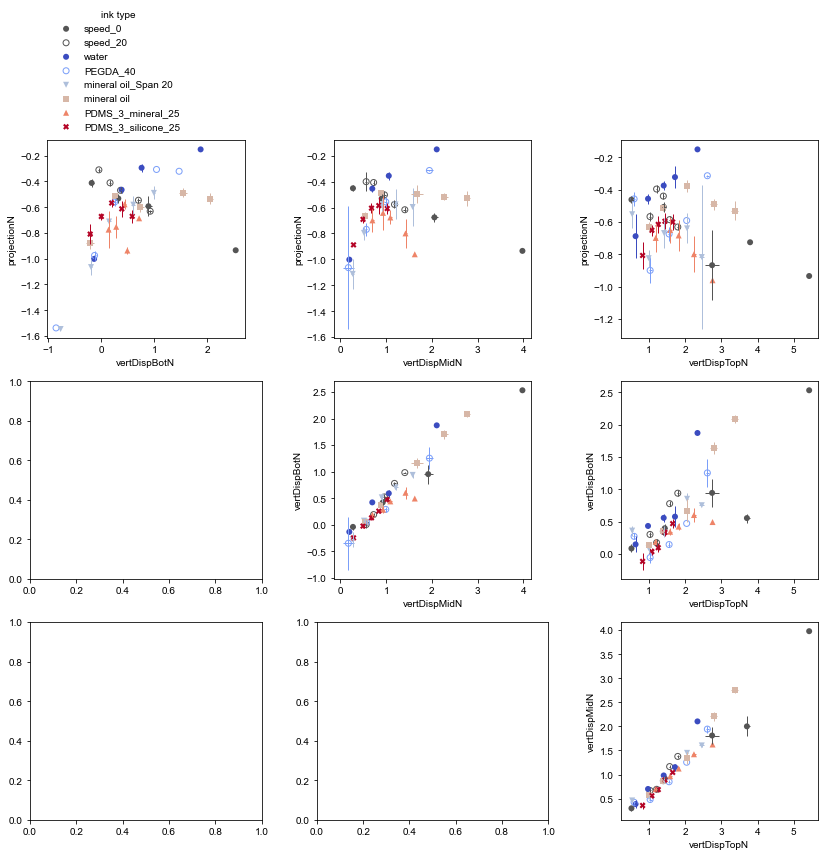

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [234]:
fig,axs = plt.subplots(3,3, figsize=(12, 12))
vs1 = vs.copy()
vs1.sort_values(by='sigma', inplace=True)
mp.simplifyType(vs1)
sl = ['projectionN', 'vertDispBotN', 'vertDispMidN', 'vertDispTopN']
for i,xvar in enumerate(sl):
    for j,yvar in enumerate(sl[0:i]):
        mp.sweepTypeSS(vs1, xvar, yvar, dx=0.25, ax=axs[j][i-1], legend=((i==1)&(j==0)))
fig.tight_layout()

In [38]:
vs1[(vs1.sweepType=='visc_2')&(vs1.vertDispBotN>0.5)&(vs1.viscRatio>10)][['bn', 'viscRatio', 'vertDispBotN', 'projectionN']]

,bn,viscRatio,vertDispBotN,projectionN
138,I_M5S_S_2.25T_211005,17.507732,0.997411,-0.361831
129,I_M4S_S_2.25T_211005,11.555566,0.554568,-0.749933


In [44]:
vs[(vs.sweepType=='speed_0_low_visc_ratio')&(vs1.vertDispBotN<-1)][['bn', 'vRatio', 'viscRatio', 'vertDispBotN', 'projectionN']]

,bn,vRatio,viscRatio,vertDispBotN,projectionN
278,I_2.75_S_2.75_VI_2.5_VS_7.5_210921,0.333333,0.729734,-1.348175,NaN
280,I_2.75_S_2.75_VI_5_VS_10_210921,0.500000,0.516760,-1.527136,NaN


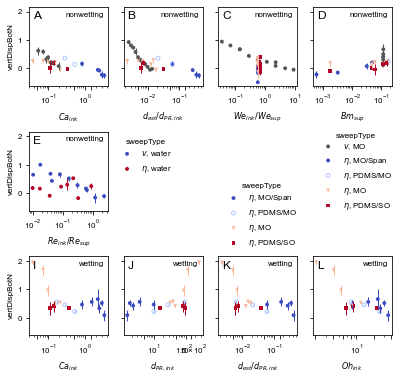

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [11]:
vs1 = vs.copy()
vs1.sort_values(by='sigma', inplace=True)
mp.simplifyType(vs1)
me.plainTypes(vs1, incSweep=1, abbrev=True)
fig, axs = plt.subplots(3,4, figsize=(6.5, 6.5), sharey=True)
me.addRatios(vs1, varlist=['We'], operator='Ratio')
kwargs = {'markersize':15, 'logx':True, 'fontsize':8}
fs = 8
for i,xvar in enumerate(['ink_Ca', 'ink_dnorm', 'WeRatio', 'sup_Bm']):
    mp.sweepTypeSS(vs1[(vs1.wetting==0)&(vs1.sigma>0)], xvar, 'vertDispBotN',
                   ax=axs[0][i], legend=(i==3), legendloc='below', **kwargs)
    if i>0:
        axs[0][i].set_ylabel('')
    axs[0][i].text(0.95, 0.95, 'nonwetting', fontsize=fs, transform=axs[0][i].transAxes, horizontalalignment='right', verticalalignment='top')
for i,xvar in enumerate(['ReRatio']):
    mp.sweepTypeSS(vs1[(vs1.wetting==0)&(vs1.ink_base=='water')], xvar, 'vertDispBotN', 
                   ax=axs[1][i], legend=(i==0), legendloc='right', **kwargs)
    if i>0:
        axs[1][i].set_ylabel('')
    axs[1][i].text(0.95, 0.95, 'nonwetting', fontsize=fs, transform=axs[1][i].transAxes, horizontalalignment='right', verticalalignment='top')
axs[1][1].remove()
axs[1][2].remove()
axs[1][3].remove()
for i,xvar in enumerate(['ink_Ca', 'ink_dPR', 'ink_dnorm', 'ink_Oh']):
    mp.sweepTypeSS(vs1[(vs1.wetting==1)&(vs1.sigma>0)], xvar, 'vertDispBotN',
                   ax=axs[2][i], legend=(i==2), legendloc='above', **kwargs)
    if i>0:
        axs[2][i].set_ylabel('')
    axs[2][i].text(0.95, 0.95, 'wetting', fontsize=fs, transform=axs[2][i].transAxes, horizontalalignment='right', verticalalignment='top')
for axrow in axs:
    for ax in axrow:
        mp.setSquare(ax)
# fig.tight_layout()
axs[0][0].set_xlabel('$Ca_{ink}$')
axs[0][1].set_xlabel('$d_{est}/d_{PR,ink}$')
axs[0][2].set_xlabel('$We_{ink}/We_{sup}$')
axs[0][3].set_xlabel('$Bm_{sup}$')
axs[1][0].set_xlabel('$Re_{ink}/Re_{sup}$')
axs[2][0].set_xlabel('$Ca_{ink}$')
axs[2][1].set_xlabel('$d_{PR,ink}$')
axs[2][2].set_xlabel('$d_{est}/d_{PR,ink}$')
axs[2][3].set_xlabel('$Oh_{ink}$')
plt.subplots_adjust(wspace=0)
mp.subFigureLabels(axs)
fig.savefig(os.path.join(cfg.path.fig, 'paper figures', 'supfigures', 'vert_botN_corrs.pdf'), bbox_inches='tight', dpi=300)